In [1]:
#knn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\mkows\OneDrive\Desktop\New folder\diabetes.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Glucose', ylabel='Insulin'>

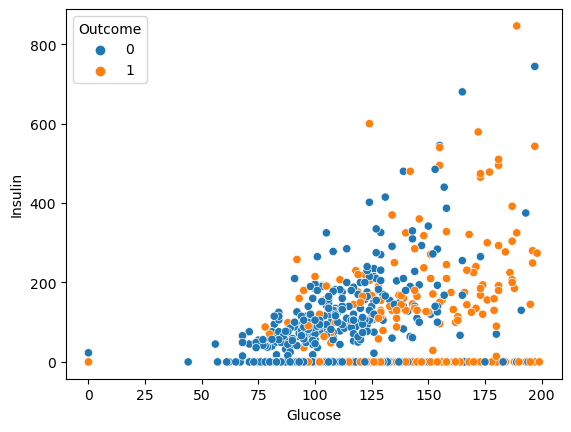

In [5]:
sns.scatterplot(data=df,x="Glucose",y="Insulin",hue="Outcome")

(0.0, 200.0)

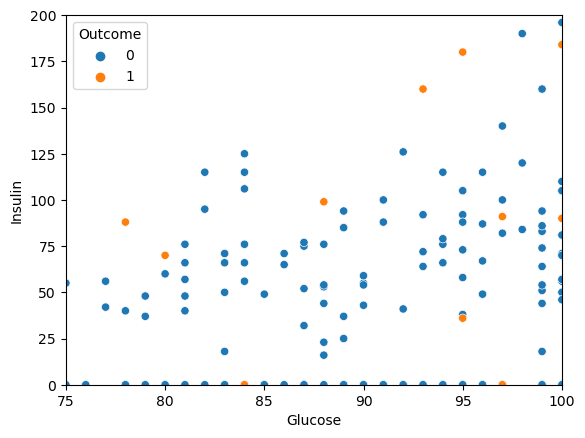

In [6]:
sns.scatterplot(data=df,x="Glucose",y="Insulin",hue="Outcome")
plt.xlim(75,100)
plt.ylim(0,200)

<Axes: >

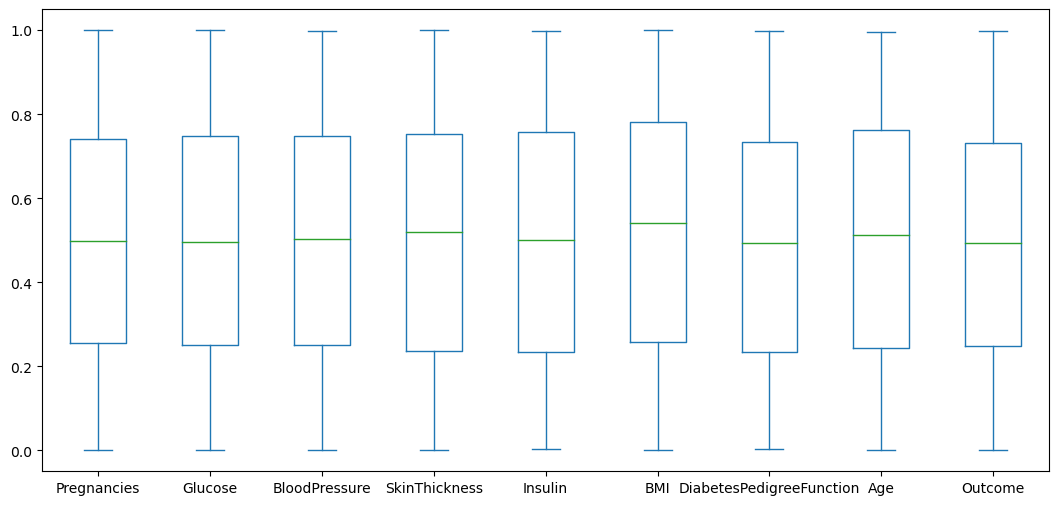

In [7]:
# box and whisker plot
kdf = pd.DataFrame(np.random.rand(768,9),columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"])
kdf
kdf.plot.box(figsize=(13, 6))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)
print(X_train.shape)
print(y_train.shape)
print("first 10 training samples:")
print(X_train.head(10))

(614, 8)
(614,)
first 10 training samples:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
602            1      124             74             36        0  27.8   
429            1       95             82             25      180  35.0   
623            0       94             70             27      115  43.5   
209            7      184             84             33        0  35.5   
589            0       73              0              0        0  21.1   
227            3      162             52             38        0  37.2   
610            3      106             54             21      158  30.9   
342            1        0             68             35        0  32.0   
503            7       94             64             25       79  33.3   
544            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
602                     0.100   30  
429                     0.233   43  
623                     0.347  

In [11]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
print(X_train[:5])
print(scaled_X_train[:5])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
602            1      124             74             36        0  27.8   
429            1       95             82             25      180  35.0   
623            0       94             70             27      115  43.5   
209            7      184             84             33        0  35.5   
589            0       73              0              0        0  21.1   

     DiabetesPedigreeFunction  Age  
602                     0.100   30  
429                     0.233   43  
623                     0.347   21  
209                     0.355   41  
589                     0.342   25  
[[-0.85811767  0.06488386  0.25332145  0.9729633  -0.68332473 -0.51313743
  -1.10316947 -0.27704152]
 [-0.85811767 -0.84697246  0.66358026  0.29304668  0.81576315  0.4081093
  -0.71238555  0.84376203]
 [-1.15412006 -0.87841578  0.04819205  0.41666788  0.27442586  1.49569224
  -0.37742791 -1.05298243]
 [ 0.91789665  1.95148313  0.76

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train,y_train)


KNeighborsClassifier()

In [13]:
ypre=knn.predict(scaled_X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
len(y_test)

154

In [16]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.56      0.53      0.55        45

    accuracy                           0.74       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.74      0.74      0.74       154



In [17]:
from sklearn.metrics import accuracy_score

In [18]:
#accuracy_knn=accuracy_score(y_test,ypre)*100
accuracy_knn=accuracy_score(y_test,ypre)
accuracy_knn

0.7402597402597403

In [19]:
t=1-accuracy_score(y_test,ypre)
t


0.2597402597402597

Text(0, 0.5, 'Error Rate')

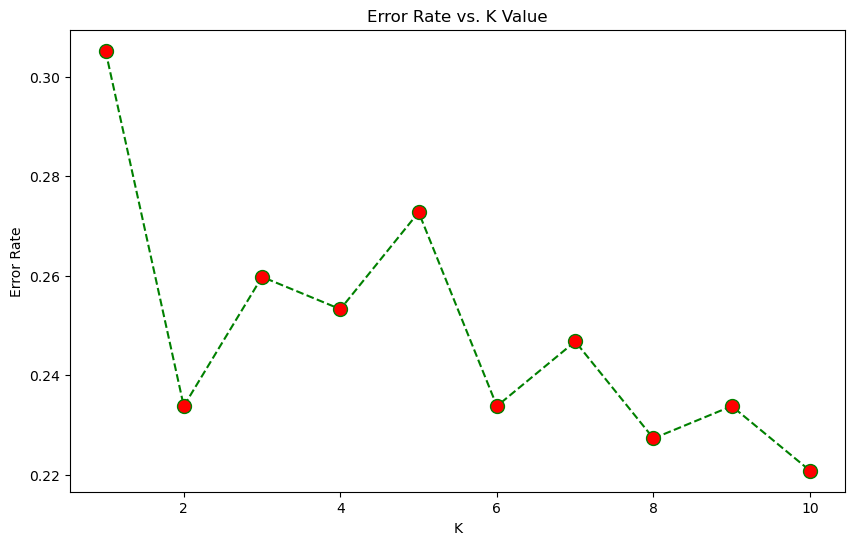

In [20]:
error_rate=[]

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')   

In [21]:
#logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [23]:
diabe=pd.read_csv(r"C:\Users\mkows\OneDrive\Desktop\New folder\diabetes.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [24]:
diabe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
feature_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_variable='Outcome'

In [26]:
X=diabe[feature_columns]
y=diabe[target_variable]

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)


(614, 8)
(614,)


In [29]:
scaler=StandardScaler()
k_X_train=scaler.fit_transform(X_train)
k_X_test=scaler.transform(X_test)

print(X_train[:5])
print('--------------------------')
print(k_X_train[:5])


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
--------------------------
[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-

In [30]:
log_reg = LogisticRegression()
model=log_reg.fit(k_X_train,y_train)
y_pred = log_reg.predict(k_X_test)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
confusion_matrix(y_test,y_pred)

array([[79, 20],
       [18, 37]], dtype=int64)

In [33]:
len(y_test)

154

In [34]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        99
           1       0.37      0.29      0.33        55

    accuracy                           0.57       154
   macro avg       0.51      0.51      0.51       154
weighted avg       0.55      0.57      0.56       154



In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_log=accuracy_score(y_test,y_pred)
#accuracy_log=accuracy_score(y_test,y_pred)*100
accuracy_log

0.7532467532467533

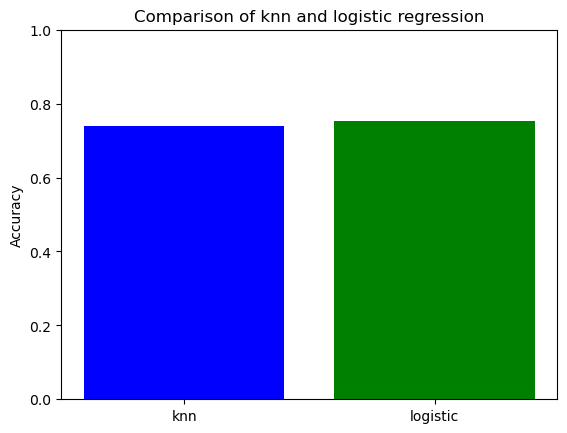

In [38]:
labels = ['knn','logistic']
accuracy_scores = [accuracy_knn,accuracy_log]

plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of knn and logistic regression')
plt.ylim(0, 1.0)  # Set the y-axis limit from 0 to 1 for accuracy values
plt.show()

In [39]:
#naivebayes

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dib=pd.read_csv(r"C:\Users\mkows\OneDrive\Desktop\New folder\diabetes.csv")
dib

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
dib.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
column_names=list(dib.columns)
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [42]:
X=column_names[0:8]
y=column_names[8]
print(X)
print(y)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Outcome


In [43]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(dib,test_size=0.25,random_state=2)
print('training input samples:',len(train))
print('testing input samples:',len(test))

training input samples: 576
testing input samples: 192


In [44]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()

In [45]:
Gmodel.fit(train[X],train[y])

train_Gpred=Gmodel.predict(train[X])
test_Gpred=Gmodel.predict(test[X])

In [46]:
train_acc_gaussian=np.mean(train_Gpred==train[y])
test_acc_gaussian=np.mean(test_Gpred==test[y])

print('gaussian nb-training accuracy:',train_acc_gaussian*100,'%')
print('gaussian nb-test accuracy:',test_acc_gaussian*100,'%')

gaussian nb-training accuracy: 76.38888888888889 %
gaussian nb-test accuracy: 76.5625 %


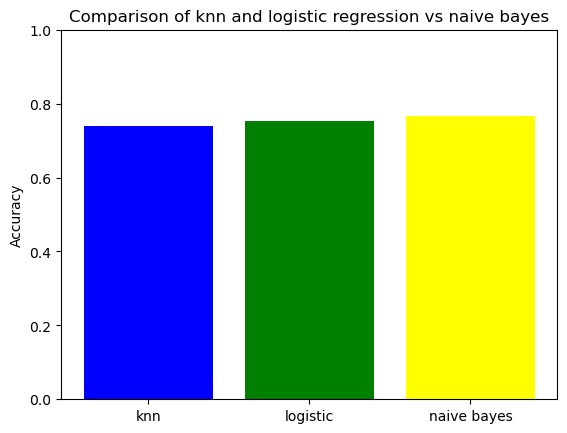

In [47]:
labels = ['knn','logistic','naive bayes']
accuracy_scores = [accuracy_knn,accuracy_log,test_acc_gaussian]

plt.bar(labels, accuracy_scores, color=['blue', 'green','yellow'])
plt.ylabel('Accuracy')
plt.title('Comparison of knn and logistic regression vs naive bayes')
 # Set the y-axis limit from 0 to 1 for accuracy values
plt.ylim(0,1.0)
plt.show()